<center>
<h1>CSC 301 Spring 2018: Homework 4</h1>
<h2>Pooneet Thaper</h2>
<h2>Professor Irina Gladkova</h2>
</center>

## Problem 1:
### Determine the number of intervals required to approximate
$$\int_{0}^{2} \frac{1}{x+4} dx$$
### to within $10^{-5}$ and compute the approximation.

In [1]:
import numpy as np
import scipy.integrate as integrate

def f_prob_1(x, deriv = 0):
    if isinstance(x,(int,float)):
        return np.math.factorial(deriv+1)/((x+4)**(deriv+1))
    else:
        return np.math.factorial(deriv+1)/(np.add(x,4*np.ones_like(x))**(deriv+1))

def eval_composite_rule(rule, func, a, b, n):
    ''' 
    Precondition:
       - rule: string containing the name of the rule to be used for approximation
       - func: string containing name of the function on which to evaluate the rule
       - a: float for left bound of the interval
       - b: float for right bound of the interval
       - n: int for number of intervals to use for composition
       
    Postcondition:
       - returns sum of resulting approximations of intervals using the chosen rule
    '''
    a = float(a)
    b = float(b)
    if not isinstance(func, str):
        func = func.__name__
    
    points = [a]
    step = (b-a)/n
    for i in range(n):
        points.append(points[-1]+step)
    
    return sum([eval("eval_{}({},{},{})".format(rule, str(func), points[i], points[i+1])) 
                for i in range(n)])
        

In [11]:
# Composition Rules to be used with eval_composition_rule in previous cell

def eval_trapazoid(func, a, b):
    '''
    Precondition: 
       - func: input string containing name of the function on which to evaluate the rule
       - a: left bound of the interval
       - b: right bound of the interval
       
    Postcondition:
       - returns the approximation of the integral of function func on [a,b] 
         using the trapazoid rule
    '''
    
    if not isinstance(func, str):
        func = func.__name__
    weights = [1.0, 1.0]
    points = [a, b]
    return (b-a)*sum([eval("{}({})".format(func, point))*weights[idx] 
                      for idx, point in enumerate(points)])/sum(weights)

def eval_simpson(func, a, b):
    '''Precondition: 
       - func: input string containing name of the function on which to evaluate the rule
       - a: left bound of the interval
       - b: right bound of the interval
       
       Postcondition:
       - returns the approximation of the integral of function func on [a,b] 
         using the simpson rule
    '''
    
    if not isinstance(func, str):
        func = func.__name__
    weights = [1.0, 4.0, 1.0]
    points = [a, (a+b)/2, b]
    return (b-a)*sum([eval("{}({})".format(func, point))*weights[idx] 
                for idx, point in enumerate(points)])/sum(weights)

def eval_gauss(func, a, b):
    '''Precondition: 
       - func: input string containing name of the function on which to evaluate the rule
       - a: left bound of the interval
       - b: right bound of the interval
       
       Postcondition:
       - returns the approximation of the integral of function func on [a,b] 
         using the gauss-legendre quadrature
    '''
    if not isinstance(func, str):
        func = func.__name__
    weights = [1.0, 1.0]
    points = [(((1-np.sqrt(3))*(b-1))/2)+a,  (((1+np.sqrt(3))*(b-1))/2)+a,]
    return (b-a)*sum([eval("{}({})".format(func, point))*weights[idx] 
                for idx, point in enumerate(points)])/sum(weights)

### a) Using the Composite Trapazoid rule;

#### Given the error formula for Composite Newton-Cotes rules:
$$  
\begin{align*}
\left| \int_{a}^{b} f(x)dx - Q_{NC(m)} \right| \leq c_m\ f^{(d+1)}(\eta)\ (\frac{b-a}{m-1})^{d+2}\ (\frac{1}{n^{d+1}})   \\
d(m) = \begin{cases} 
      m-1 & m \textrm{ is even}  \\
      m & m \textrm{ is odd}
   \end{cases}
\end{align*}
$$

#### we can solve for the number of intervals we would need to acheive an upper bound on the error to within $10^{-5}$. We could take the upper bound on the appropriate derivitive throughout the interval $ [a,b] $ and use that upper bound in the above formula, which will give us an overestimate of the number of intervals needed. This is because we are assuming that the upper bound of the appropriate derivitive is approximate the same in each interval.
#### In the case of $ f(x) = \frac{1}{x-4}$, the derivitives monotonically decrease as $ x $ increases, meaning we could have a much smaller derivitive in intervals closer to the right endpoint $ b $, and thus have a lower error in those intervals. This could offset the error from larger intervals closer to the left endpoint $ a $, where the derivitive will be larger, using the smaller error in the intervals closer to the right endpoint $b$, thus allowing fewer, larger intervals.

#### Using the first approach, we can solve for n:
$$
\begin{align*}
c_m\ f^{(d+1)}(\eta)\ (\frac{b-a}{m-1})^{d+2}\ (\frac{1}{n^{d+1}}) < \epsilon \\
n > \sqrt[\leftroot{-2}\uproot{2}{d+1}]{c_m\ f^{(d+1)}(\eta)\ (\frac{b-a}{m-1})^{d+2}\ \frac{1}{\epsilon}}\\
\end{align*}
$$
#### Plugging in $ m = 2,\; d = 1,\; a = 0, \; b = 2,\; c_m = \frac{1}{12},\; f^{(d+1)}(\eta) = \frac{1}{32},$ and $\; \epsilon = 10^{-5} $ we get:
$$
\begin{equation}
n > \sqrt[\leftroot{-2}\uproot{2}{d+1}]{c_m\ f^{(d+1)}(\eta)\ (\frac{b-a}{m-1})^{d+2}\ \frac{1}{\epsilon}}\\
n > \sqrt[\leftroot{-2}\uproot{2}{1+1}]{(\frac{1}{12})\ (\frac{1}{32})\ (\frac{2-0}{2-1})^{1+2}\ (\frac{1}{10^{-5}})}\\
n > 45.64 \\
\end{equation}
$$
#### The Trapazoid Rule requires at least 46 intervals to acheive an approximation to within $ 10^{-5}$.

In [48]:
a = 0.0
b = 2.0
n = 46
x = np.linspace(a, b, num=n+1)
y = f_prob_1(x)

print("Composite Simpson Approximation (see code above):", 
      eval_composite_rule("simpson", "f_prob_1", a, b, n))

print("SciPy.Integrate.trapz Approximation:\t\t ", 
      integrate.trapz(y, x))

print("SciPy.Integrate.Quad(integration, abs error):\t", 
      integrate.quad(lambda x: eval("f_prob_1({})".format(x)), a, b))

Composite Simpson Approximation (see code above): 0.4054651081314989
SciPy.Integrate.trapz Approximation:		  0.405470577804
SciPy.Integrate.Quad(integration, abs error):	 (0.4054651081081644, 4.501566987038123e-15)


### b) Using the Composite Simpson rule;

#### Similar to part a, we can use the equations:
$$
\begin{align*}
c_m\ f^{(d+1)}(\eta)\ (\frac{b-a}{m-1})^{d+2}\ (\frac{1}{n^{d+1}}) < \epsilon \\
n > \sqrt[\leftroot{-2}\uproot{2}{d+1}]{c_m\ f^{(d+1)}(\eta)\ (\frac{b-a}{m-1})^{d+2}\ \frac{1}{\epsilon}}\\
\end{align*}
$$
#### Plugging in $ m = 3,\; d = 3,\; a = 0, \; b = 2,\; c_m = \frac{1}{90},\; f^{(d+1)}(\eta) = \frac{3}{128},$ and $\; \epsilon = 10^{-5} $ we get:
$$
\begin{equation}
n > \sqrt[\leftroot{-2}\uproot{2}{d+1}]{c_m\ f^{(d+1)}(\eta)\ (\frac{b-a}{m-1})^{d+2}\ \frac{1}{\epsilon}}\\
n > \sqrt[\leftroot{-2}\uproot{2}{3+1}]{(\frac{1}{90})\ (\frac{3}{128})\ (\frac{2-0}{3-1})^{3+2}\ (\frac{1}{10^{-5}})}\\
n > 2.259 \\
\end{equation}
$$
#### The Simpson One-Third Rule requires at least 3 intervals to acheive an approximation to within $ 10^{-5}$.

In [49]:
a = 0.0
b = 2.0
n = 3
x = np.linspace(a, b, num=n+1)
y = f_prob_1(x)

print("Composite Simpson Approximation (see code above):", 
      eval_composite_rule("simpson", "f_prob_1", a, b, n))

print("SciPy.Integrate.simps Approximation:\t\t ", 
      integrate.simps(y, x))

print("SciPy.Integrate.Quad(integration, abs error):\t", 
      integrate.quad(lambda x: eval("f_prob_1({})".format(x)), a, b))

Composite Simpson Approximation (see code above): 0.4054663745840216
SciPy.Integrate.simps Approximation:		  0.405919312169
SciPy.Integrate.Quad(integration, abs error):	 (0.4054651081081644, 4.501566987038123e-15)


### c) Using the Composite Gaussian quadrature rule.

#### For this question, the exact meaning of the Composite Gaussian Quadrature is a bit unclear but was interpreted as trying to find the number of intervals where the Gaussian Quadrature with a fixed number of points is applied in each interval. The Gauss-Legendre Quadrature utilizing two points is used here since the number of points is neither specified nor the parameter in question.
#### Given the error formula for the non-composite Guass Quadrature:
$$
\left| \int_{a}^{b} f(x)dx - Q_{GL(m)} \right| \leq f^{(2m)}(\eta)\ \frac{(b-a)^{2m+1}\ (m!)^{4}}{(2m+1)\ [(2m)!]^{3}}   \\
$$
#### we can see that the only portion that actually depends on the length of the interval, the main consideration when applying composition to a quadrature rule, is the $ (b-a)^{2m+1} $, which we can replace with $ (\frac{b-a}{n})^{2m+1} $ to account for the reduction of the length of the interval into $ n $ subintervals. Additionally, we can replace $ m $ with $ 2 $ and multiply the entire expression by $ n $ to account for the sum of the errors of the $ n $ intervals. After these modifications, we get:

$$
\left| \int_{a}^{b} f(x)dx - Q_{GL(2)} \right| \leq\ f^{(4)}(\eta)\ \frac{(b-a)^{5}\ (2!)^{4}}{(5)\ [(4)!]^{3}}\ \frac{n}{n^{5}}  < \epsilon \\
n > \sqrt[\leftroot{0}\uproot{0}{4}]{f^{(4)}(\eta)\ \frac{(b-a)^{5}\ (2!)^{4}}{\epsilon\ (5)\ [(4)!]^{3}}}\\
$$
#### Plugging in $ a = 0, \; b = 2,\; f^{4}(\eta) = \frac{3}{128},$ and $\; \epsilon = 10^{-5} $ we get:
$$
n > \sqrt[\leftroot{0}\uproot{0}{4}]{\frac{3}{128}\ \frac{(2-0)^{5}\ (2)^{4}}{10^{-5}\ (5)\ [24]^{3}}}\\
n>2.053
$$
#### The Gauss_Legendre quadrature requires at least 3 intervals to acheive an approximation to within $ 10^{-5}$.

In [51]:
print("Composite Gauss Quadrature (see code above):\t ", 
      eval_composite_rule("gauss", "f_prob_1", 0, 2, 5))

a = 0
b = 2
n = 5
points = [a]
step = (b-a)/n
for i in range(n):
    points.append(points[-1]+step)
print("Composite SciPy Gauss (fixed_quad):\t\t ", 
      sum([item[0] for item in [integrate.fixed_quad(lambda x: eval("f_prob_1({})".format(x)), 
                                points[i], points[i+1], n = 1) for i in range(n)]]))

print("SciPy.quad (integration, abs error):\t\t", 
      integrate.quad(lambda x: eval("f_prob_1({})".format(x)), 0, 2))

Composite Gauss Quadrature (see code above):	  0.42549727944947513
Composite SciPy Gauss (fixed_quad):		  0.405234208293
SciPy.quad (integration, abs error):		 (0.4054651081081644, 4.501566987038123e-15)


## Problem 2:
### Plot $ f(x) = \sin(1/x) $ and $ g(x) = \cos(1/x) $ on $ [0.1,2] $. Use Adaptive quadrature to approximate the integrals
$$
\int_{0.1}^{2} f(x)\ dx \quad \textrm{and} \quad \int_{0.1}^{2} g(x)\ dx
$$
### to within $ 10^{-3} $. Find the number of subintervals used for each function. Are they similar? Explain.

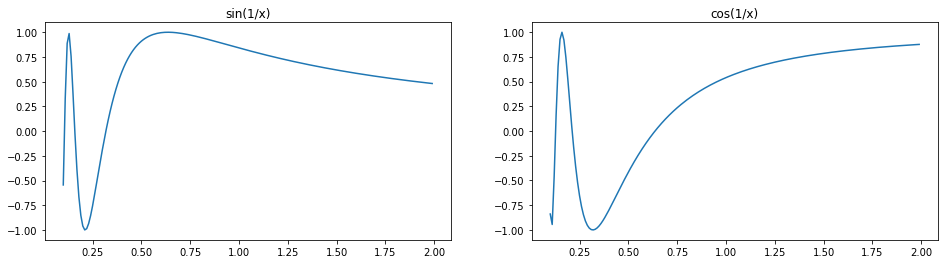

In [23]:
import matplotlib.pyplot as plt

x = np.arange(0.1, 2, 0.01)
sin_vals = np.sin(1/x)
cos_vals = np.cos(1/x)

fig, ax = plt.subplots(ncols = 2, sharex = True, figsize = (16,4))

ax[0].plot(x, sin_vals)
ax[0].set_title("sin(1/x)")
ax[1].plot(x, cos_vals)
ax[1].set_title("cos(1/x)")

plt.show()

In [44]:
from scipy import integrate
cos_approx, cos_err, cos_info = integrate.quad(lambda x: np.cos(x), 0.1, 2, full_output=True, epsabs=1e-3)
sin_approx, sin_err, sin_info = integrate.quad(lambda x: np.sin(x), 0.1, 2, full_output=True, epsabs=1e-3)

print("Cos approximation {} with error {} using {} intervals using {}"
      .format("%.8f" % cos_approx,"%.13f" % cos_err, cos_info["last"],"Scipy.integrate.quad"))
print("Sin approximation {} with error {} using {} intervals using {}"
      .format("%.8f" % sin_approx,"%.13f" % sin_err, sin_info["last"],"Scipy.integrate.quad"))

Cos approximation 0.80946401 with error 0.0000000000000 using 1 intervals using Scipy.integrate.quad
Sin approximation 1.41115100 with error 0.0000000000000 using 1 intervals using Scipy.integrate.quad


#### Using Scipy.integrate.quad, which implements an adaptive quadrature and allows access to the number of sub intervals created during the calculation fo the quadrature, I approximated the integral of $ \cos(1/x) and \sin(1/x) $. To my surprise, the two approximations resulted in a very minimal error using a single interval for each function. This may just be the effectiveness of the Fortran Quadpack method used and, unfortunately, I was not able to control the degree or function used for the quadrature using Scipy.integrate.quad.

## Problem 3:
### Determine the coefficients a, b, c, d that will determine a quadrature formula
$$
\int_{-1}^{1} f(x)\ dx = af(-1) + bf(1) + cf'(-1) + df'(1)\\
$$
### that is exact for all polynomials of degree less than or equal to 3.

#### By substituting $ 1, x, x^2, x^3 $ for $ f(x) $ and solving the resulting system of equations for the variables $ a, b, c, d $, we should be able to find the correct values for this quadrature formula.
$$
\int_{-1}^{1} f(x)\ dx = af(-1) + bf(1) + cf'(-1) + df'(1)\\
\int_{-1}^{1} 1\ dx = 2 = a(1) + b(1) + c(0) + d(0)\\
\int_{-1}^{1} x\ dx = 0 = a(-1) + b(1) + c(1) + d(1)\\
\int_{-1}^{1} x^2\ dx = 2/3 = a(1) + b(1) + c(-2) + d(2)\\
\int_{-1}^{1} x^3\ dx = 0 = a(-1) + b(1) + c(3) + d(3)\\
$$

#### We can express this system of equations in matrix form
$
\begin{bmatrix}
    1 & 1 & 0 & 0 \\
    -1 & 1 & 1 & 1 \\
    1 & 1 & -2 & 2 \\
    -1 & 1 & 3 & 3 \\
\end{bmatrix}$$
\begin{bmatrix}
    a \\
    b \\
    c \\
    d \\
\end{bmatrix}$
=$
\begin{bmatrix}
    2 \\
    0 \\
    2/3 \\
    0 \\
\end{bmatrix}
$
#### and solve for the coefficients.

$
\begin{bmatrix}
    a \\
    b \\
    c \\
    d \\
\end{bmatrix}$
=$
\begin{bmatrix}
    1 & 1 & 0 & 0 \\
    -1 & 1 & 1 & 1 \\
    1 & 1 & -2 & 2 \\
    -1 & 1 & 3 & 3 \\
\end{bmatrix} ^ {-1}$$
\begin{bmatrix}
    2 \\
    0 \\
    2/3 \\
    0 \\
\end{bmatrix}$
=$
\begin{bmatrix}
    1 \\
    1 \\
    1/3 \\
    -1/3 \\
\end{bmatrix} 
$

#### The resulting quadrature formula is:
$$
\int_{-1}^{1} f(x) dx = (1) f(-1) + (1) f(1) + (1/3) f'(-1) - (1/3) f'(1) \\
$$
#### and the coefficients are:
$$
a = 1 \\
b = 1 \\
c = 1/3 \\
d = -1/3 \\
$$

## Problem 4:
### Let $ Q_n $ be the equally spaced composite trapazoidal rule:
$$
Q_n\ =\ h\ (\  \frac{1}{2}f(x_1)\ +\ f(x_2)\ + \ \dots\ +\ f(x_{n-1})\ + \frac{1}{2}\ f(x_n)\ )\\
h=(\frac{b-a}{n-1}) \\
n \geq 2
$$
### where $ x\ =\ linspace(a,b,c) $ and we assume that $ n\ \leq\ 2 $. Assume that there is a onstant $ C $ (independent of $n$), such that
$$ 
I\ =\ \int_{a}^{b} f(x)dx\ =\ Q_n + Ch^2
$$

### a) Give an expression for $ \left| I - Q_{2n} \right| $ in terms of $\left| Q_{2n} - Q_{n} \right|$.

#### Firstly, we determine the value of $ \left| I - Q_{2n} \right| $ as follows:
$$
\left| I - Q_{2n} \right| = \left| Ch^2 \right| = \left| C(\frac{b-a}{2n-1})^2 \right| \\
$$
#### Next, we can determine the value of $\left| Q_{2n} - Q_{n} \right|$ as follows:
$$
I = Q_{2n} + C(\frac{b-a}{2n-1})^2 = Q_{n} + C(\frac{b-a}{n-1})^2 \\
\begin{split}
\left| Q_{2n} - Q_{n} \right| & = \left| C(\frac{b-a}{n-1})^2 - C(\frac{b-a}{2n-1})^2 \right| \\
& = \left| C(b-a)^2 ((\frac{1}{n-1})^2 - (\frac{1}{2n-1})^2) \right| \\
& = \left| C(b-a)^2 (\frac{n(3n-2)}{(n-1)^2(2n-1)^2}) \right| \\
\end{split}
$$
#### Using the values of $ \left| I - Q_{2n} \right| $ and $\left| Q_{2n} - Q_{n} \right|$, we can determine
$$
\left| I - Q_{2n} \right| = \left| Q_{2n} - Q_{n} \right| \frac{(n-1)^2}{n(3n-2)}
$$

### b) Write an efficient script that computes $ Q_{2^{k+1}} $, where $ k $ is the smallest positive integer so that $ \left| I - Q_{2^{k+1}} \right| $ is smaller than some given positive $ \textrm{tol} $. You may assume that such a $ k $ exists. You may assume that the integrand function is available in $ \textrm{f.m} $ and that it accepts vector arguements.

#### General procedure:

* k := 2
* Q_last := Q_k
* do:
    * compute Q_{2k}
    * calculate the error |I - Q_{2k}| using |Q_{2k} - Q_{k}| as in part (a)
    * if error < tol:
        * return Q_{2k}, 2k, error
    * else:
        * Q_last := Q_{2k}
        * k := k*2
* while(True)

In [45]:
# See start of assignment for code for composite evaluation
# and for the evaluation of the trapazoid rule

import numpy as np

def q_given_tol(func, a, b, tol):
    k = 2;
    q_last = eval_composite_rule("trapazoid", func, a, b, k-1)
    
    k*=2
    q_current = eval_composite_rule("trapazoid", func, a, b, k-1)
    error = np.abs(q_current - q_last) * (((n-1)**2)/(n*((3*n)-2)))
    
    while error >= tol:
        q_last = q_current
        k*=2
        q_current = eval_composite_rule("trapazoid", func, a, b, k-1)
        error = np.abs(q_current - q_last) * (((n-1)**2)/(n*((3*n)-2)))
        
    return q_current, k, error

print("Approximation of integral of 1/(x+4) from 0 to 2 (from prob 1) using Q_n")
print(" (Q_n, n, |I - Q_n|):\n", q_given_tol("f_prob_1", 0, 2, 1e-5))

Approximation of integral of 1/(x+4) from 0 to 2 (from prob 1) using Q_n
 (Q_n, n, |I - Q_n|):
 (0.40547715143721835, 32, 9.6956921275648262e-06)
